In [1]:
%store -r

print("Project configuration:")
print(f"SLUG = {SLUG}")
print(f"DATA_DIR = {DATA_DIR}")
print(f"DATASET_KEY = {DATASET_KEY}")
print(f"FIG_DIR = {FIG_DIR}")
print(f"REP_DIR = {REP_DIR}")
print(f"NOTEBOOK_DIR = {NOTEBOOK_DIR}")

missing_vars = [var for var in ['SLUG', 'DATA_DIR', 'FIG_DIR', 'REP_DIR', 'NOTEBOOK_DIR', 'DATASET_KEY'] if var not in globals()]
print(f"Vars not found in globals: {missing_vars}")

# Set default values if variables are not found in store or are empty
if not SLUG:  # Check if empty string
    print(f"{SLUG=} is empty, initializing everything explicitly")
    SLUG = 'customer-segmentation'
    DATASET_KEY = 'vjchoudhary7/customer-segmentation-tutorial-in-python'
    GIT_ROOT = Path.cwd().parent.parent
    DATA_DIR = GIT_ROOT / 'data' / SLUG
    FIG_DIR = GIT_ROOT / 'figures' / SLUG
    REP_DIR = GIT_ROOT / 'reports' / SLUG
    NOTEBOOK_DIR = GIT_ROOT / 'notebooks' / SLUG


Project configuration:
SLUG = customer-segmentation
DATA_DIR = /Users/ravisharma/workdir/eda_practice/data/customer-segmentation
DATASET_KEY = vjchoudhary7/customer-segmentation-tutorial-in-python
FIG_DIR = /Users/ravisharma/workdir/eda_practice/figures/customer-segmentation
REP_DIR = /Users/ravisharma/workdir/eda_practice/reports/customer-segmentation
NOTEBOOK_DIR = /Users/ravisharma/workdir/eda_practice/notebooks/customer-segmentation
Vars not found in globals: []


In [2]:
from pathlib import Path
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

In [3]:
# Downloading data

base_df = pd.DataFrame()

CSV_PATH = Path(DATA_DIR) / "Mall_Customers.csv"
if not CSV_PATH.exists:
    print(f"CSV {CSV_PATH} does not exist. base_df will remain empty.")
else:
    base_df = pd.read_csv(CSV_PATH)
    print(f"CSV {CSV_PATH} loaded successfully.")

base_df.head()

CSV /Users/ravisharma/workdir/eda_practice/data/customer-segmentation/Mall_Customers.csv loaded successfully.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
base_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


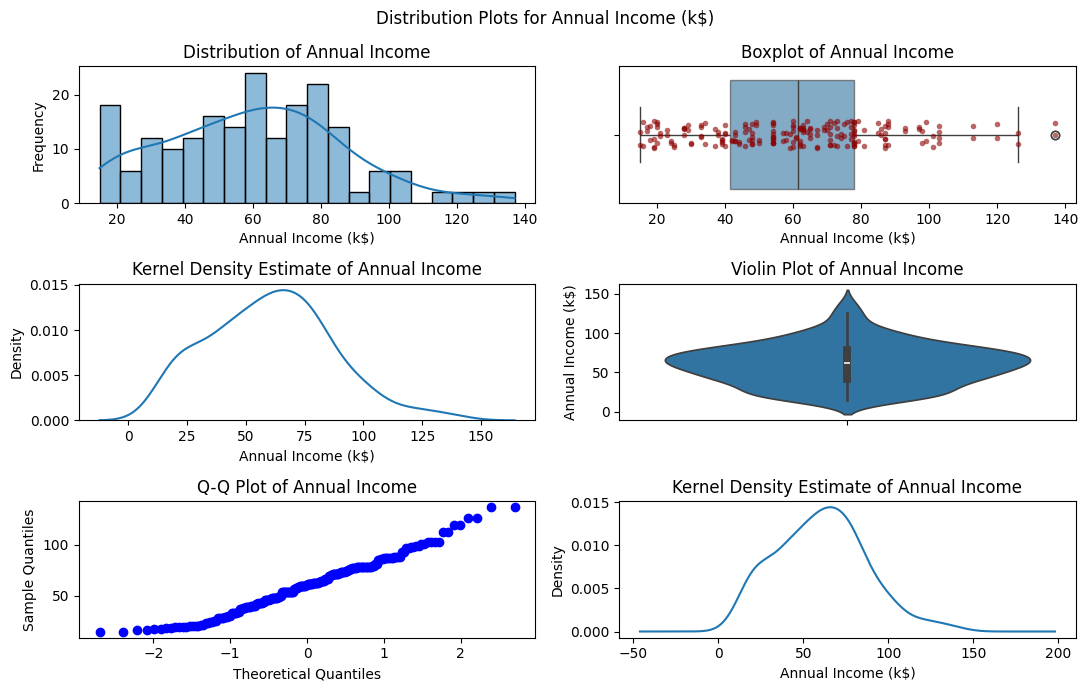

In [18]:
## Distribution Plots

# Histogram
# plt.figure(figsize=(11, 7))
col = 'Annual Income (k$)'

figure, axes = plt.subplots(3, 2, figsize=(11, 7))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]
ax5, ax6 = axes[2]
figure.suptitle(f'Distribution Plots for {col}')

sns.histplot(base_df[col], bins=20, kde=True, ax=ax1)
ax1.set_title('Distribution of Annual Income')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Frequency')
# Alt:
# plt.hist(base_df[col], bins=50, alpha=0.5, density=True)

sns.boxplot(x=base_df[col], boxprops=dict(alpha=0.6), ax=ax2)
ax2.set_title('Boxplot of Annual Income')
ax2.set_xlabel('Annual Income (k$)')
sns.stripplot(
    x=base_df[col],
    color='darkred',
    size=4,
    jitter=True,
    alpha=0.6,
    ax=ax2
)

sns.kdeplot(base_df[col], ax=ax3)
ax3.set_title('Kernel Density Estimate of Annual Income')
ax3.set_xlabel('Annual Income (k$)')
# base_df[col].plot(kind='kde', ax=ax3)
# base_df[col].plot.density(ax=ax3)

sns.violinplot(y=base_df[col], ax=ax4)
ax4.set_title('Violin Plot of Annual Income')
ax4.set_ylabel('Annual Income (k$)')

stats.probplot(base_df[col], dist="norm", plot=ax5, fit=False)
ax5.set_title('Q-Q Plot of Annual Income')
ax5.set_xlabel('Theoretical Quantiles')
ax5.set_ylabel('Sample Quantiles')

base_df[col].plot(kind='kde', ax=ax6)
ax6.set_title('Kernel Density Estimate of Annual Income')
ax6.set_xlabel('Annual Income (k$)')


figure.tight_layout()
plt.show()


# Q-Q Plot Distribution Options

The `dist` parameter in `scipy.stats.probplot()` accepts various probability distributions. Here are the most commonly used options:

## **Continuous Distributions:**

**Most Common:**
- `"norm"` - Normal distribution (default)
- `"lognorm"` - Log-normal distribution
- `"expon"` - Exponential distribution
- `"uniform"` - Uniform distribution

**Other Continuous Distributions:**
- `"gamma"` - Gamma distribution
- `"beta"` - Beta distribution
- `"chi2"` - Chi-squared distribution
- `"f"` - F-distribution
- `"t"` - Student's t-distribution
- `"weibull_min"` - Weibull distribution
- `"pareto"` - Pareto distribution
- `"logistic"` - Logistic distribution
- `"laplace"` - Laplace distribution
- `"cauchy"` - Cauchy distribution
- `"rayleigh"` - Rayleigh distribution
- `"gumbel_r"` - Gumbel distribution (right-skewed)
- `"gumbel_l"` - Gumbel distribution (left-skewed)

## **Alternative Usage:**

You can also pass a distribution object from `scipy.stats`:

```python
from scipy import stats

# Using string name
stats.probplot(data, dist="norm", plot=ax)

# Using distribution object
stats.probplot(data, dist=stats.norm, plot=ax)

# With parameters
stats.probplot(data, dist=stats.gamma, sparams=(2,), plot=ax)
```

## **For Income Data:**

Since we're working with "Annual Income", you might want to try:
- `"norm"` - if you expect normal distribution
- `"lognorm"` - if income follows log-normal (common for income data)
- `"gamma"` - another common choice for positive-valued data like income
- `"expon"` - if you suspect exponential distribution


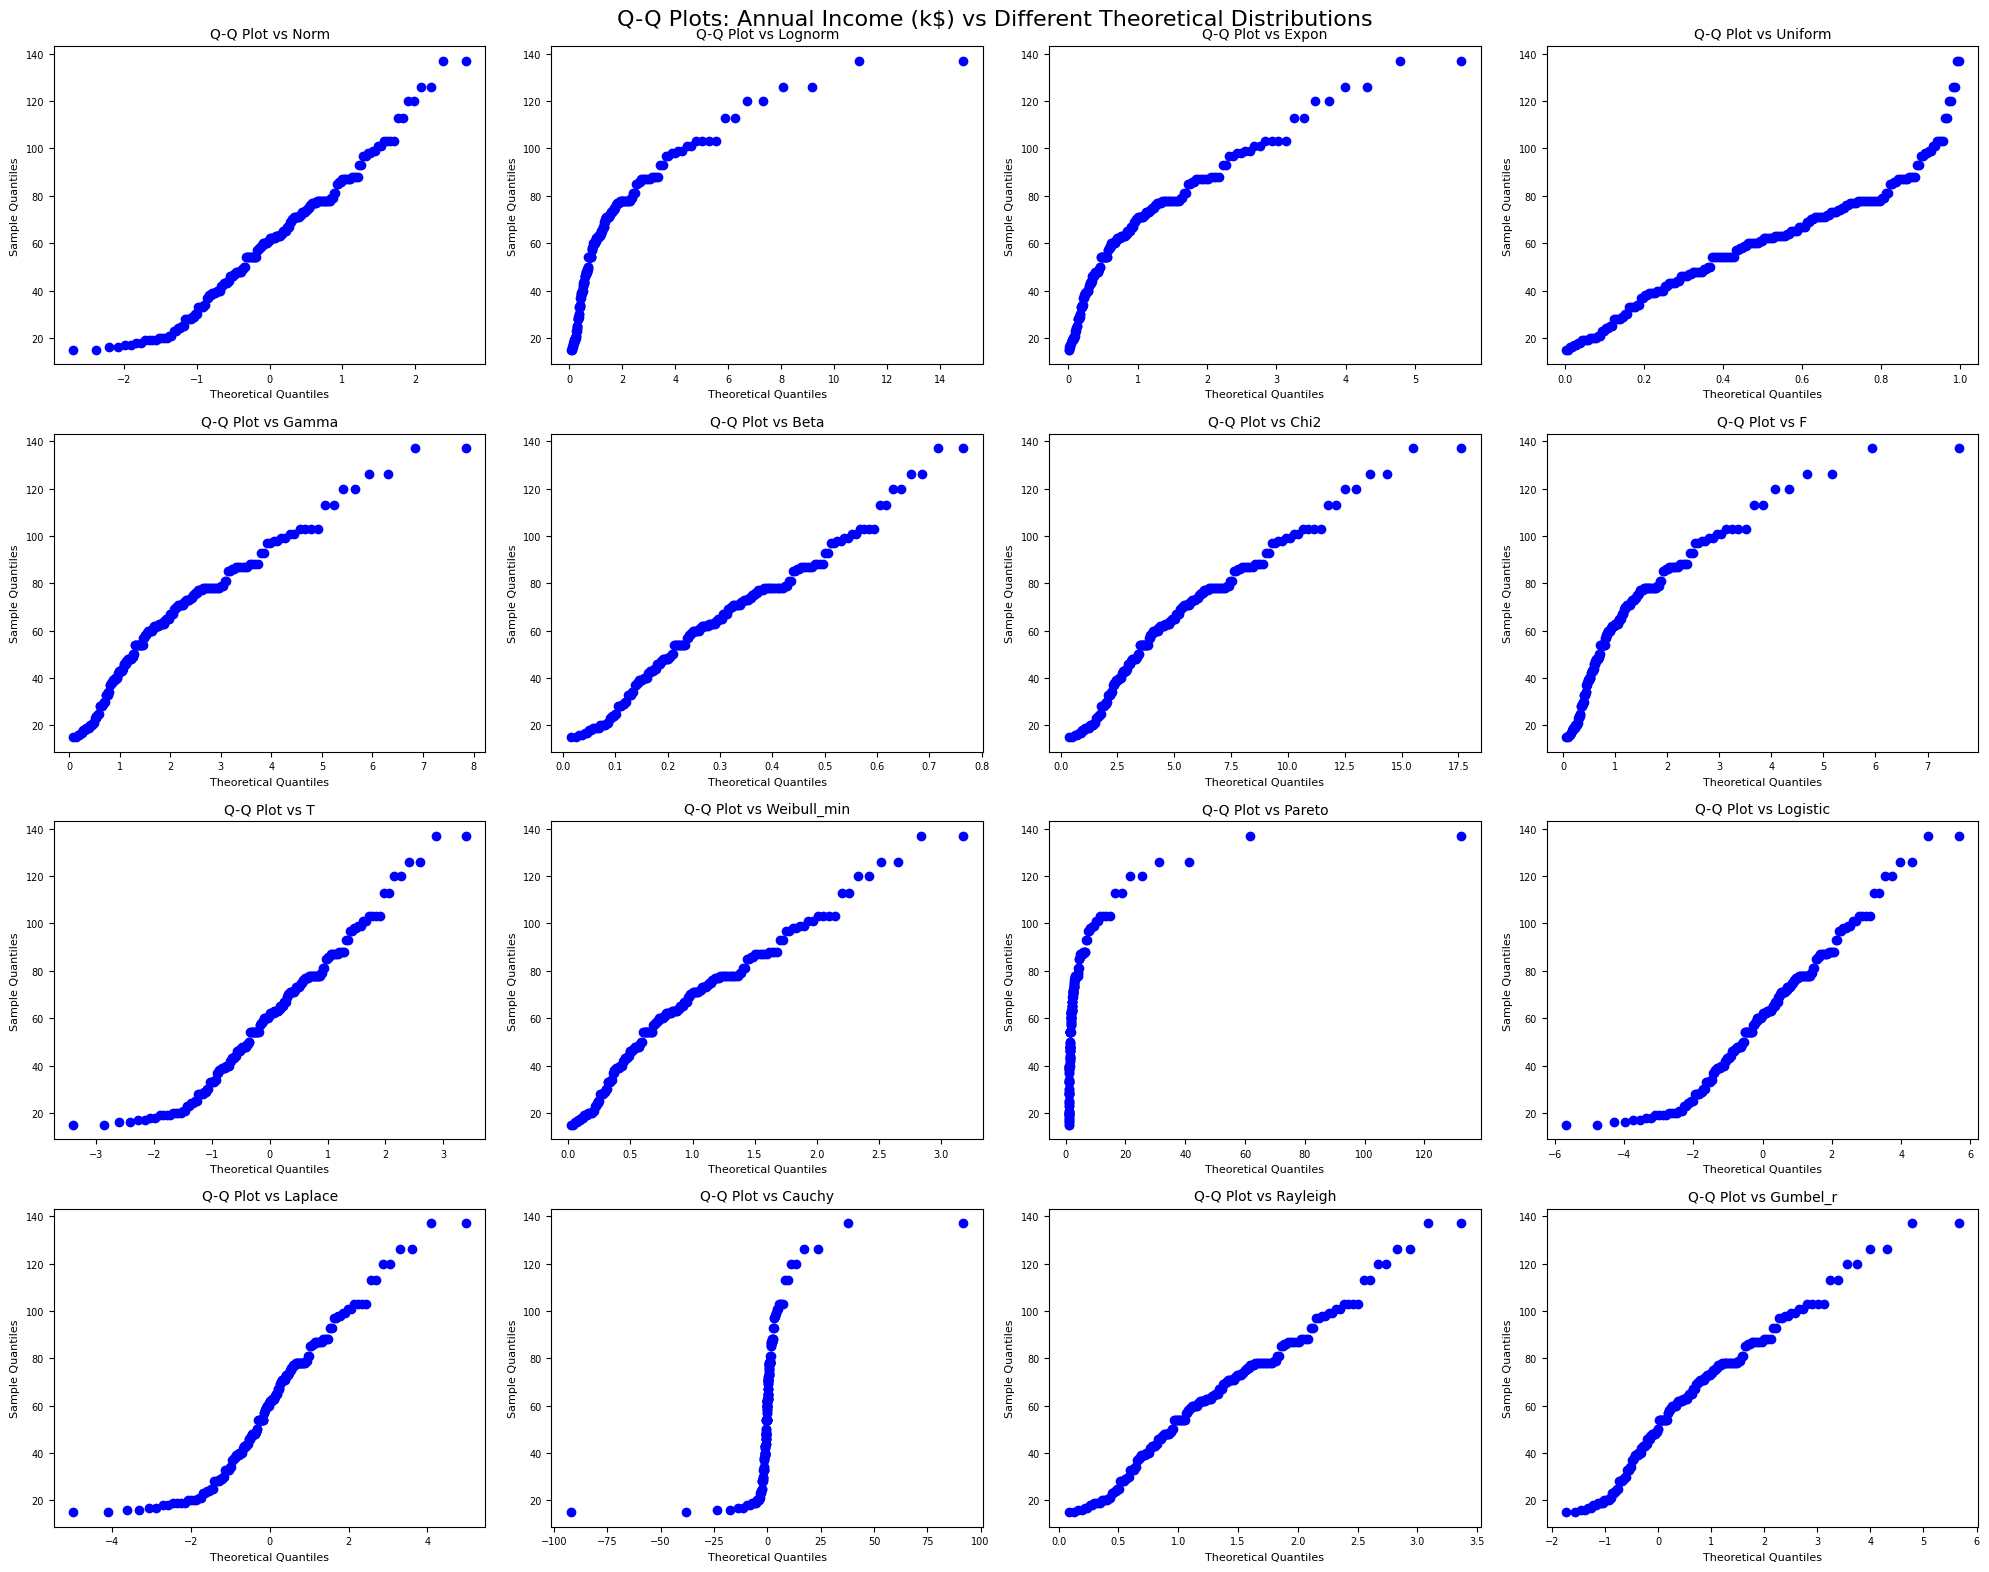


VISUAL ASSESSMENT GUIDE:
Look for Q-Q plots where points follow a straight diagonal line.
The closer to a straight line, the better the fit to that distribution.

Common patterns:
• Straight line = Good fit
• S-curve = Heavy tails (data more extreme than theoretical)
• Inverted S-curve = Light tails (data less extreme than theoretical)
• Curved upward = Right skew in data
• Curved downward = Left skew in data


In [21]:
# Q-Q Plot Comparison Across Different Distributions

# List of distributions with their mathematical parameters and explanations
distributions_config = [
    # Normal Distribution: μ=0, σ=1 (standard normal)
    # No parameters needed - uses standardized form
    ('norm', {}),
    
    # Log-Normal Distribution: if X ~ LogNormal(μ, σ), then ln(X) ~ Normal(μ, σ)
    # sparams=(s,) where s is the shape parameter (σ in the normal of log(X))
    # Higher s = more right-skewed, more spread in the tail
    ('lognorm', {'sparams': (1,)}),
    
    # Exponential Distribution: λ rate parameter (λ=1 by default)
    # Models time between events in Poisson process, memoryless property
    ('expon', {}),
    
    # Uniform Distribution: continuous uniform on [0,1] by default
    # All values in interval equally likely, rectangular PDF
    ('uniform', {}),
    
    # Gamma Distribution: Γ(α, β) where α=shape, β=scale
    # sparams=(α,) - shape parameter controls skewness and tail behavior
    # α<1: decreasing PDF, α=1: exponential, α>1: unimodal with mode at (α-1)/β
    ('gamma', {'sparams': (2,)}),
    
    # Beta Distribution: B(α, β) on interval [0,1]
    # sparams=(α, β) - both shape parameters
    # α, β > 1: unimodal, α=β=1: uniform, α<1 or β<1: U-shaped or J-shaped
    ('beta', {'sparams': (2, 5)}),
    
    # Chi-Squared Distribution: χ²(k) where k = degrees of freedom
    # sparams=(k,) - sum of k squared independent standard normal variables
    # Used in hypothesis testing, confidence intervals for variance
    ('chi2', {'sparams': (5,)}),
    
    # F-Distribution: F(d1, d2) where d1, d2 are degrees of freedom
    # sparams=(d1, d2) - ratio of two chi-squared distributions
    # Used in ANOVA, regression F-tests
    ('f', {'sparams': (5, 10)}),
    
    # Student's t-Distribution: t(ν) where ν = degrees of freedom
    # sparams=(ν,) - approaches normal as ν→∞, heavier tails for small ν
    # Used when population variance unknown, small samples
    ('t', {'sparams': (10,)}),
    
    # Weibull Distribution (minimum): commonly used in reliability analysis
    # sparams=(c,) where c is shape parameter
    # c<1: decreasing hazard, c=1: exponential, c>1: increasing hazard
    ('weibull_min', {'sparams': (1.5,)}),
    
    # Pareto Distribution: power law distribution, "80-20 rule"
    # sparams=(b,) where b is shape parameter (Pareto index)
    # Lower b = heavier tail, more inequality. Common in economics, city sizes
    ('pareto', {'sparams': (1.16,)}),
    
    # Logistic Distribution: similar to normal but heavier tails
    # Used in logistic regression, has closed-form CDF
    ('logistic', {}),
    
    # Laplace Distribution (Double Exponential): symmetric, peaked at center
    # Heavier tails than normal, used in robust statistics, L1 regularization
    ('laplace', {}),
    
    # Cauchy Distribution: no defined mean or variance, very heavy tails
    # Ratio of two independent normal variables, pathological properties
    ('cauchy', {}),
    
    # Rayleigh Distribution: magnitude of 2D vector with normal components
    # Used in communications, wind speed modeling, has one parameter σ=1 default
    ('rayleigh', {}),
    
    # Gumbel Distribution (Type I extreme value): max of exponential variables
    # Used for modeling extreme events (floods, earthquakes, stock crashes)
    ('gumbel_r', {})
]

# Create comprehensive subplot grid - 4 rows x 4 columns for visual comparison
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle(f'Q-Q Plots: {col} vs Different Theoretical Distributions', fontsize=16, y=0.98)

# Flatten 2D axes array to 1D for easier iteration through distributions
axes_flat = axes.flatten()

# Generate Q-Q plot for each distribution
for i, (dist_name, params) in enumerate(distributions_config):
    ax = axes_flat[i]
    
    try:
        # stats.probplot() compares sample quantiles vs theoretical quantiles
        # If data follows the distribution, points should lie on straight diagonal line
        # fit=False: don't show the fitted line, just the points
        # sparams: shape parameters required by some distributions
        stats.probplot(base_df[col], dist=dist_name, plot=ax, fit=False, **params)
        
        # Formatting for readability in the grid layout
        ax.set_title(f'Q-Q Plot vs {dist_name.capitalize()}', fontsize=10)
        ax.set_xlabel('Theoretical Quantiles', fontsize=8)  # Expected quantiles from distribution
        ax.set_ylabel('Sample Quantiles', fontsize=8)       # Observed quantiles from data
        ax.tick_params(labelsize=7)
        
    except Exception as e:
        # Some distributions might fail with certain parameter combinations
        # Display error message instead of crashing the entire plot
        ax.text(0.5, 0.5, f'Error with {dist_name}:\n{str(e)[:50]}...', 
                ha='center', va='center', transform=ax.transAxes, fontsize=8)
        ax.set_title(f'Q-Q Plot vs {dist_name.capitalize()} (Error)', fontsize=10)
        ax.set_xticks([])  # Clean up failed plot
        ax.set_yticks([])

plt.tight_layout()
plt.show()

# Summary of best fits (visual assessment guide)
print("\n" + "="*60)
print("VISUAL ASSESSMENT GUIDE:")
print("="*60)
print("Look for Q-Q plots where points follow a straight diagonal line.")
print("The closer to a straight line, the better the fit to that distribution.")
print("\nCommon patterns:")
print("• Straight line = Good fit")
print("• S-curve = Heavy tails (data more extreme than theoretical)")
print("• Inverted S-curve = Light tails (data less extreme than theoretical)")
print("• Curved upward = Right skew in data")
print("• Curved downward = Left skew in data")
